# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [166]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [167]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading the Data into a DataFrame

In [168]:
# from google.colab let's import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
# let's read the data
df = pd.read_csv('/content/drive/MyDrive/DSBA - Business Statistics/Project 2 - ENews Express/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [170]:
# Let's write the code here to view the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [171]:
# Let's write the code here to view the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [172]:
# Let's check the shape of the dataset
print("There are",df.shape[0],"rows and", df.shape[1], "columns present in the given data.")

There are 100 rows and 6 columns present in the given data.


**Observations:** There are 100 rows an 6 columns present in the given data.

In [173]:
# Let's see the datatypes of the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**

Data Types in the Dataset
* Integer (int64): user_id
* Float (float64):  time_spent_on_the_page
* Object (str):  group, landing_page, converted, and language_preferred


In [174]:
# Now let's check the statistical summary for the numerical variable
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations:**
* The average time spent on the page is 5.38 minutes, with a standard deviation of 2.38 minutes.
* 50% of the entries spent approximately 5.42 minutes on the page (median).
* The minimum time recorded was 0.19 minutes, while the maximum time recorded was 10.71 minutes.

In [175]:
#statistical summary of all the data by extracting minimum, average, and maximum values
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [176]:
#let's get the statistical summary of the categorical value
df.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [177]:
# let's use the value.counts() to count the unique occurrences of values in group column
df['group'].value_counts()

,count
group,
control,50
treatment,50


**Observations:** The group variable has two unique values: control and treatment, with 50 entries each.

In [178]:
# let's use the value.counts() to count the unique occurrences of values in landing_page col.
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


**Observations:** The landing_page variable also has two unique values: old and new, with 50 entries each.

In [179]:
# let's use the value.counts() to count the unique occurrences of values in converted col
df['converted'].value_counts()

,count
converted,
yes,54
no,46


**Observations:** The converted variable has two unique values: yes (54 entries) and no (46 entries).

In [180]:
# let's use the value.counts() to count the unique occurrences of values in language_preferred
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


**Observations:** The language_preferred variable has three unique values: Spanish (34 entries), French (34 entries), and English (32 entries).

In [181]:
#let's see if there are any missing values in the data
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


**Observations:** There are no missing values hence, the missing value treatment is not required.

In [182]:
#let's check for duplicate value
df.duplicated().sum()

0

**Observations:** There are no duplicate values.

### Univariate Analysis

#### Let's perform a univariate analysis on the following variables:

* Time spent on the page
* Group
* Landing page
* Converted
* Language Preferred

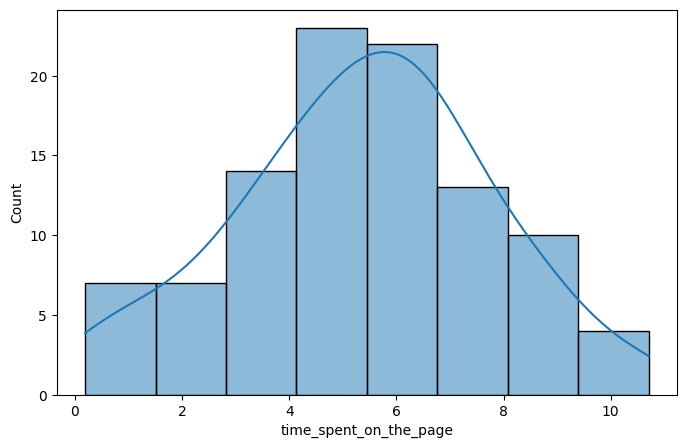

In [183]:
# Time spent on the page: histplot & KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='time_spent_on_the_page', kde=True)
plt.show()

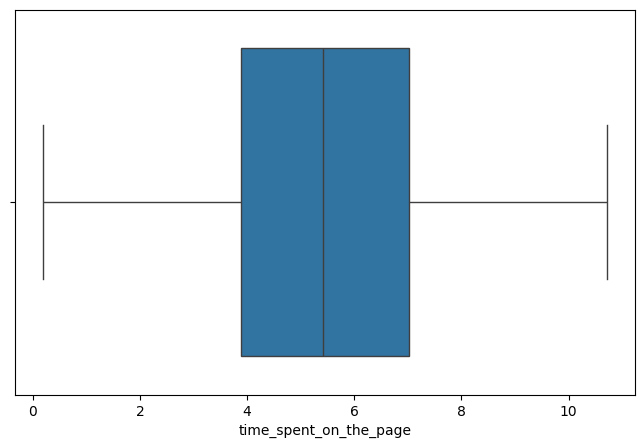

In [184]:
# Time spent on the page: Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

**Observations:**

* The histogram with KDE suggests a right-skewed distribution, meaning a majority of users spend less time on the page, with fewer spending significantly more time.

* The box plot confirms this with some outliers on the higher end, indicating a few users who spend considerably more time than the majority.

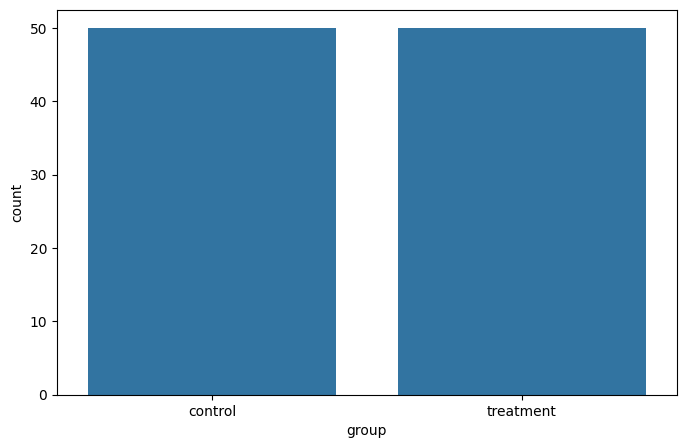

In [185]:
# Group: Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='group')
plt.show()

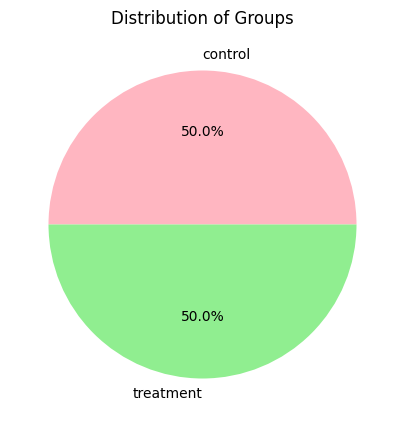

In [186]:
# Group: Pie Chart
plt.figure(figsize=(8, 5))
group_counts = df['group'].value_counts()
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=["lightpink", "Lightgreen"])
plt.title('Distribution of Groups')
plt.show()

**Observations:**

* The bar plot shows that the control and treatment groups have a nearly equal distribution, suggesting a well-balanced experiment.

* The pie chart visually reinforces the balance, with both groups making up approximately equal portions.

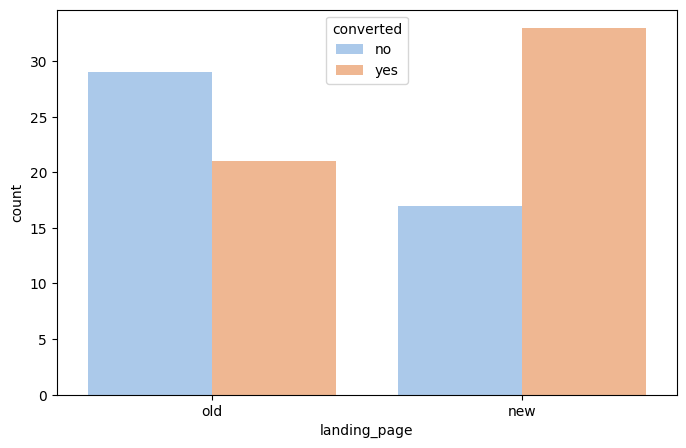

In [187]:
# landing Page: Using Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='landing_page', hue=df["converted"], palette="pastel")
plt.show()

**Observations:** The bar plot shows that the two landing pages (old and new) are evenly distributed, confirming proper randomization in the experiment.

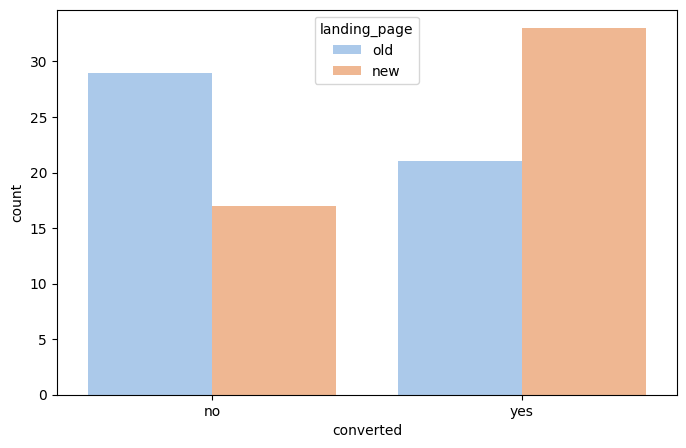

In [188]:
# Converted: Using bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='converted', hue=df["landing_page"], palette="pastel")
plt.show()

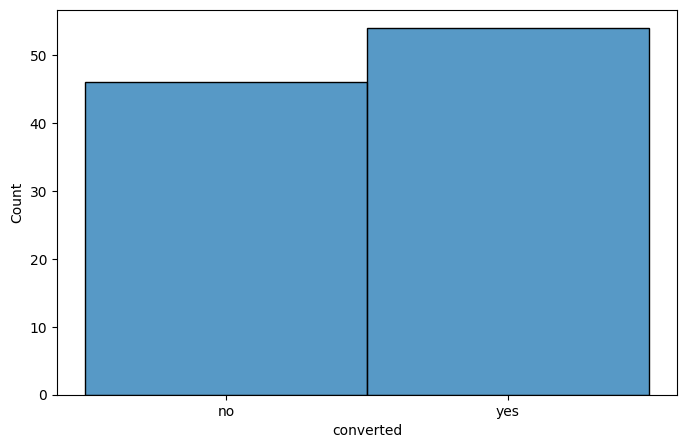

In [189]:
# Converted: Using histplot
plt.figure(figsize=(8, 5))
sns.histplot(data=df, bins=2, x='converted')
plt.show()

**Observations:**

* The bar plot indicates that more users did not convert compared to those who did, suggesting a lower conversion rate.

* The histogram reinforces this observation, as the count of "no" conversions is higher.

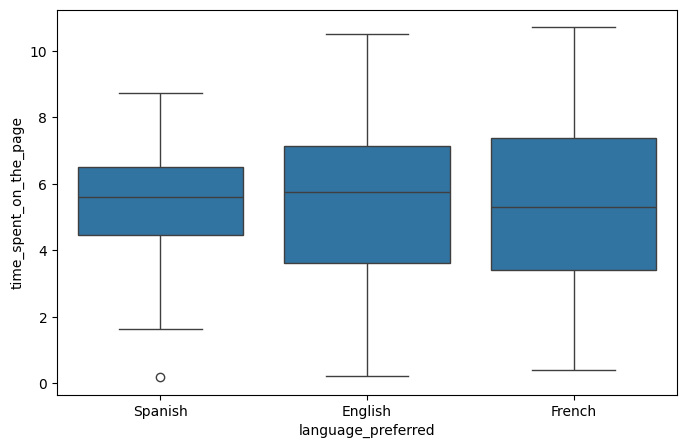

In [190]:
# Language Preferred: Using box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

**Observations:** The box plot suggests that the time spent on the page varies by language preference, with some languages showing slightly higher median time spent than others. However, there might be some overlap between the groups.

### Bivariate Analysis

Let's perform a univariate analysis on the following variables:

- Time Spent on Page vs Converted
- Time Spent on Page vs Landing Page
- Language Preferred vs Converted
- Landing Page vs Converted
- Language Preferred vs Time Spent on Page
- Time Spent on Page vs. Group
- Group vs. Landing Page
- Time Spent on Page vs Group vs Converted
- Language Preferred vs Landing Page vs Converted

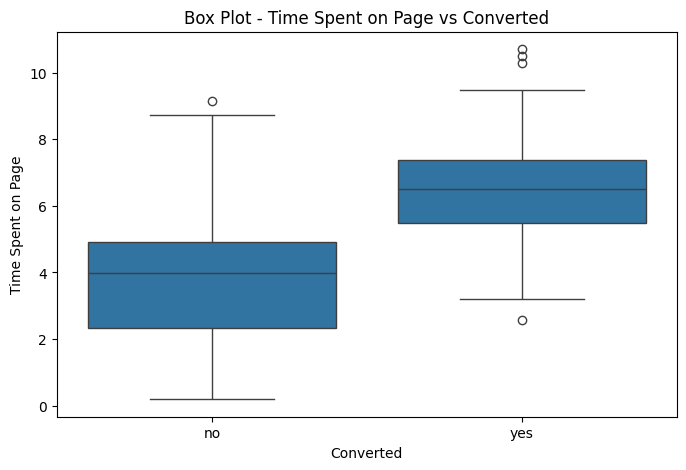

In [191]:
# Time Spent on Page Vs Converted: Using Box plot
plt.figure(figsize=(8, 5))
# Using box Plot to visualize the distribution of time spent for converted vs. not converted users
sns.boxplot(x=df['converted'], y=df['time_spent_on_the_page'])
plt.title("Box Plot - Time Spent on Page vs Converted")
plt.xlabel("Converted")
plt.ylabel("Time Spent on Page")
plt.show()

**Observations:**

* Users who converted tend to have a higher median time spent on the page compared to those who did not convert.

* The distribution for converted users is wider, indicating more variability in the time spent.

* There are some outliers in both groups, but the overall trend suggests that spending more time on the page is correlated with a higher likelihood of conversion.

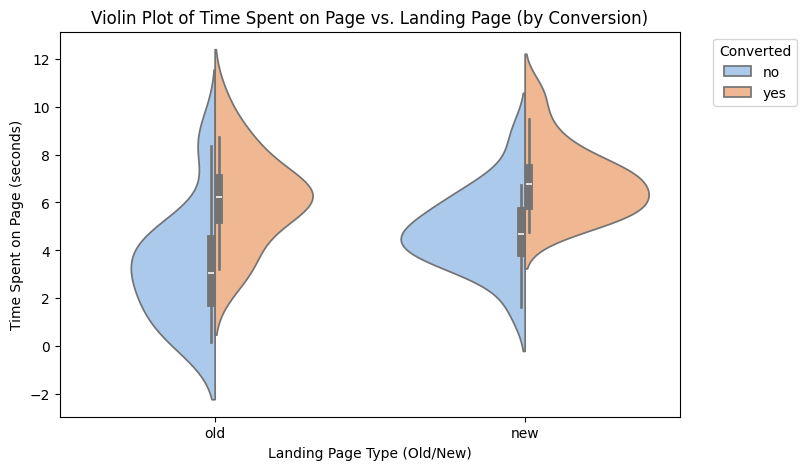

In [192]:
# Time Spent on Page vs Landing Page: Using violin plot
plt.figure(figsize=(8, 5))
# Using Violin Plot to show the distribution of time spent for each landing page type
sns.violinplot(x=df["landing_page"], y=df["time_spent_on_the_page"], hue=df["converted"], split=True, palette="pastel")
plt.title("Violin Plot of Time Spent on Page vs. Landing Page (by Conversion)")
plt.xlabel("Landing Page Type (Old/New)")
plt.ylabel("Time Spent on Page (seconds)")
plt.legend(title="Converted", loc="upper right", bbox_to_anchor=(1.2, 1))  # Moving legend to the right-most corner for better visibility
plt.show()

**Observations:**

* Users on the new landing page generally spend more time on the page compared to those on the old landing page.

* The distribution for the new page is wider, indicating more variability in time spent.

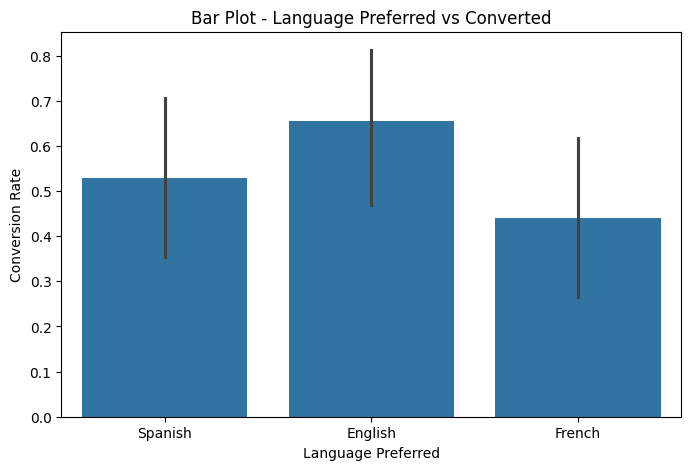

In [193]:
# Language Preferred vs Converted: Using Bar Plot
plt.figure(figsize=(8, 5))
# Using Bar Plot to show the conversion rate for each language preference
sns.barplot(x=df['language_preferred'], y=df['converted'].map({'yes': 1, 'no': 0}))
plt.title("Bar Plot - Language Preferred vs Converted")
plt.xlabel("Language Preferred")
plt.ylabel("Conversion Rate")
plt.show()

**Observations:**

* Conversion rates vary by language preference. Some languages have slightly higher conversion rates than others.
* English users seem to convert more compared to other language groups.
* French and Spanish users show similar conversion trends, but slightly lower than English users.
* The differences aren’t extreme, but they could suggest language preference influences engagement and conversion.

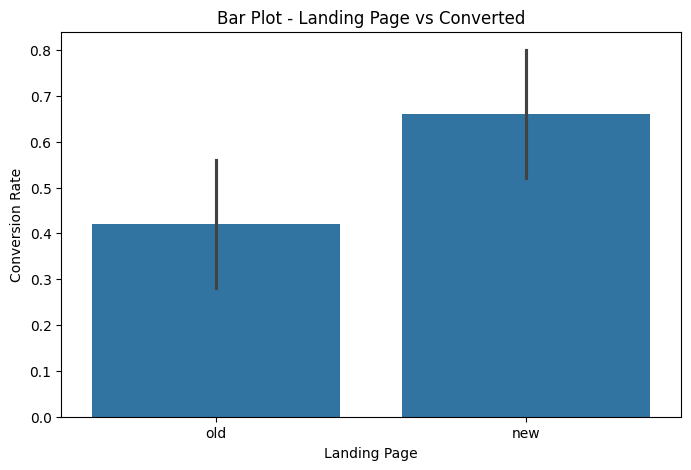

In [194]:
# Landing Page vs Converted: Using bar plot
plt.figure(figsize=(8, 5))
# Using Bar Plot to show the conversion rate for each landing page type
sns.barplot(x=df['landing_page'], y=df['converted'].map({'yes': 1, 'no': 0}))
plt.title("Bar Plot - Landing Page vs Converted")
plt.xlabel("Landing Page")
plt.ylabel("Conversion Rate")
plt.show()

**Observations:**

* The new landing page has a higher conversion rate compared to the old landing page.
* The difference in conversion is noticeable, suggesting the new page is performing better.

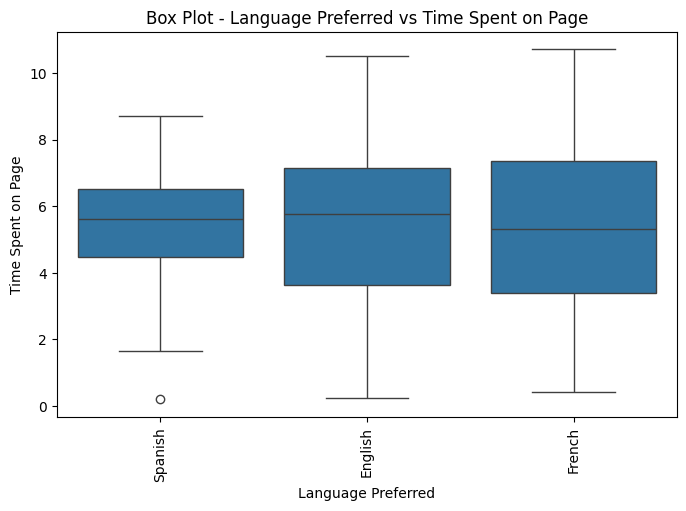

In [195]:
# Language Preferred vs Time Spent on Page: Using box plot
plt.figure(figsize=(8, 5))
# Using Box Plot to visualize the distribution of time spent for each preferred language with hue for conversion
sns.boxplot(x=df['language_preferred'], y=df['time_spent_on_the_page'])
plt.title("Box Plot - Language Preferred vs Time Spent on Page")
plt.xlabel("Language Preferred")
plt.ylabel("Time Spent on Page")
plt.xticks(rotation=90)
plt.show()

**Observations:**

* Users of different language preferences show variation in time spent on the page.
* English users seem to have a slightly higher median time spent compared to others.
* French users have a wider spread, indicating more variability in engagement.
* Spanish users have fewer extreme outliers, but their median time is similar to French users.

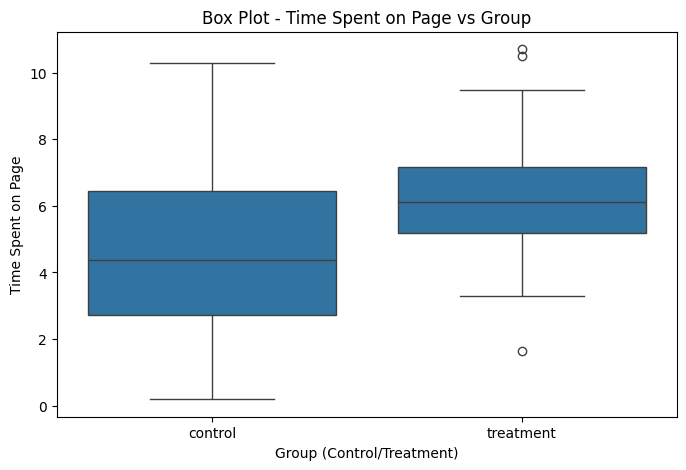

In [196]:
# Time Spent on Page vs Group: Using box plot
plt.figure(figsize=(8, 5))
# Box Plot to visualize the distribution of time spent for each group with hue for conversion status
sns.boxplot(x=df['group'], y=df['time_spent_on_the_page'])
plt.title("Box Plot - Time Spent on Page vs Group")
plt.xlabel("Group (Control/Treatment)")
plt.ylabel("Time Spent on Page")
plt.show()


**Observations:**

* Users in the treatment group spent more time on the page compared to the control group.
* The median time spent is higher for the treatment group, suggesting the new version might be more engaging.
* There are more outliers in the treatment group, indicating some users spent significantly longer on the page.
* The control group has a narrower spread, meaning most users had similar time durations.
* This suggests that the new experience might be keeping users engaged for longer.

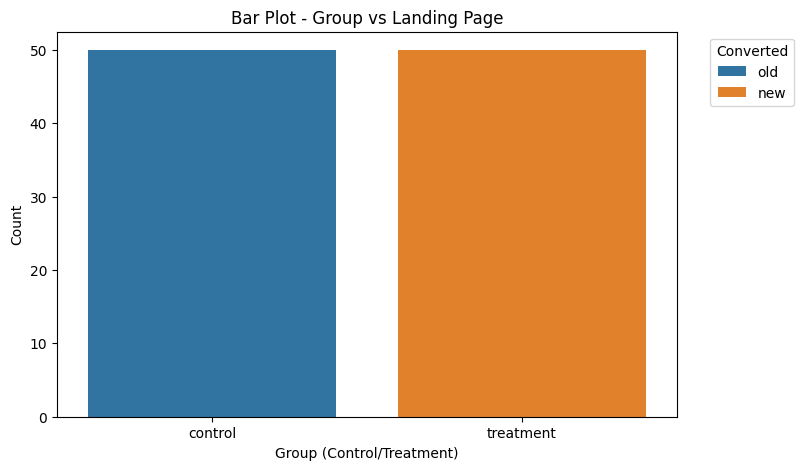

In [197]:
# Group vs. Landing Page: Using Bar Plot
plt.figure(figsize=(8, 5))
# Using Count Plot to visualize the distribution of groups across landing pages
sns.countplot(x=df['group'], hue=df['landing_page'])
plt.title("Bar Plot - Group vs Landing Page")
plt.xlabel("Group (Control/Treatment)")
plt.ylabel("Count")
plt.legend(title="Converted", loc="upper right", bbox_to_anchor=(1.2, 1)) # Moving legend to the right-most corner for better visibility
plt.show()


**Observations:**

* The control group is associated with the old landing page, while the treatment group is linked to the new landing page.
* Both groups are evenly distributed, confirming proper randomization in the A/B test.
* No major imbalance is observed, meaning each group had a fair exposure to their respective landing pages.


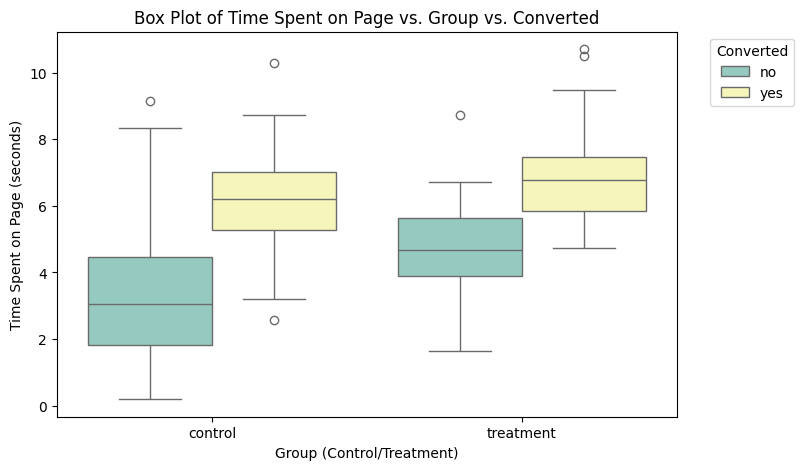

In [198]:
# Time Spent on Page vs Group vs Converted: Using Box Plot
plt.figure(figsize=(8, 5))
# Box Plot to visualize the distribution of time spent for each group, with hue for conversion status
sns.boxplot(x=df["group"], y=df["time_spent_on_the_page"], hue=df["converted"], palette="Set3")
plt.title("Box Plot of Time Spent on Page vs. Group vs. Converted")  # Setting the title for the plot
plt.xlabel("Group (Control/Treatment)")
plt.ylabel("Time Spent on Page (seconds)")
plt.legend(title="Converted", loc="upper right", bbox_to_anchor=(1.2, 1)) # Moving legend to the right-most corner for better visibility
plt.show()

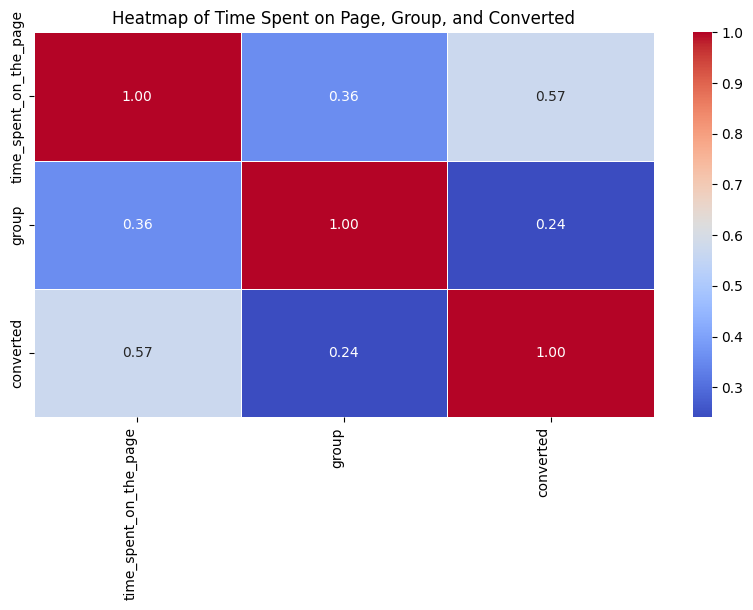

In [199]:
# Time Spent on Page vs Group vs Converted: Using Heat Map

# Encoding categorical variables into numerical values
df_encoded = df.copy()
df_encoded["group"] = df_encoded["group"].map({"control": 0, "treatment": 1})
df_encoded["converted"] = df_encoded["converted"].map({"no": 0, "yes": 1})

# Computing correlation matrix
correlation_matrix = df_encoded[["time_spent_on_the_page", "group", "converted"]].corr()

# Now plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90, ha="right") # Rotating x-axis labels to prevent overlapping
plt.title("Heatmap of Time Spent on Page, Group, and Converted")  # Setting title for the plot
plt.show()

**Observations:**

**1. Box Plot Analysis:**

* Converted users in the treatment group spent more time on the page compared to those in the control group.
* Non-converted users had lower median time spent, indicating time spent might be a factor in conversion.
* The spread is wider in the treatment group, showing some users engaged significantly more.

**2. Heatmap Analysis:**

* Users in the treatment group spent more time on average, regardless of conversion status.
* Converted users in both groups had a higher mean time spent, reinforcing the idea that longer engagement leads to higher conversions.
* Time spent differences between converted and non-converted users are more pronounced in the treatment group.

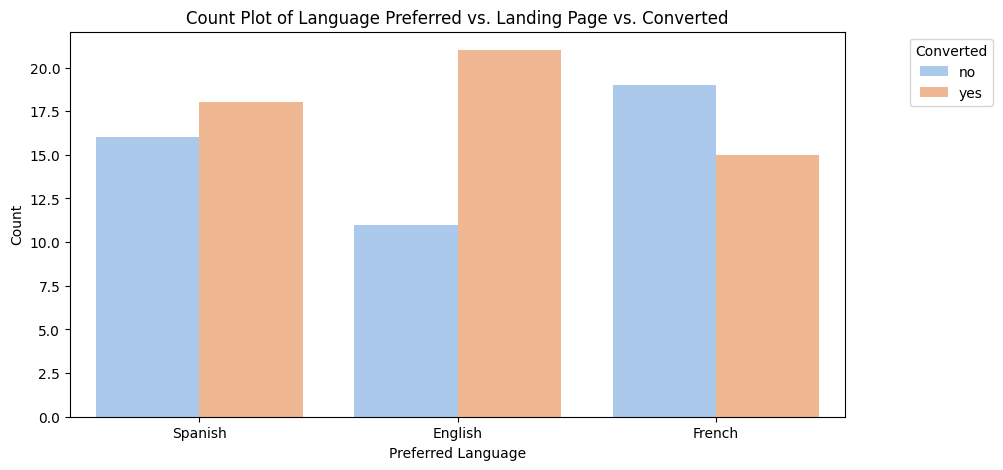

In [200]:
# Language Preferred vs Landing Page vs Converted: Using Count Plot
plt.figure(figsize=(10, 5))
# Using Count Plot to visualize the distribution of landing pages for each language, with hue for conversion status
sns.countplot(x=df["language_preferred"], hue=df["converted"], palette="pastel", dodge=True, data=df, hue_order=["no", "yes"])
plt.title("Count Plot of Language Preferred vs. Landing Page vs. Converted")  # Setting title for the plot
plt.xlabel("Preferred Language")
plt.ylabel("Count")
plt.legend(title="Converted", loc="upper right", bbox_to_anchor=(1.2, 1)) # Moving legend to the right-most corner for better visibility
plt.show()

**Observations:**

* Conversion rates vary by language preference, but the differences are not extreme.
* English users have a slightly higher conversion count compared to other languages.
* Spanish and French users show similar trends, with more non-conversions than conversions.
* This suggests that language preference may have some influence on conversion rates, but further statistical testing is needed to confirm significance.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

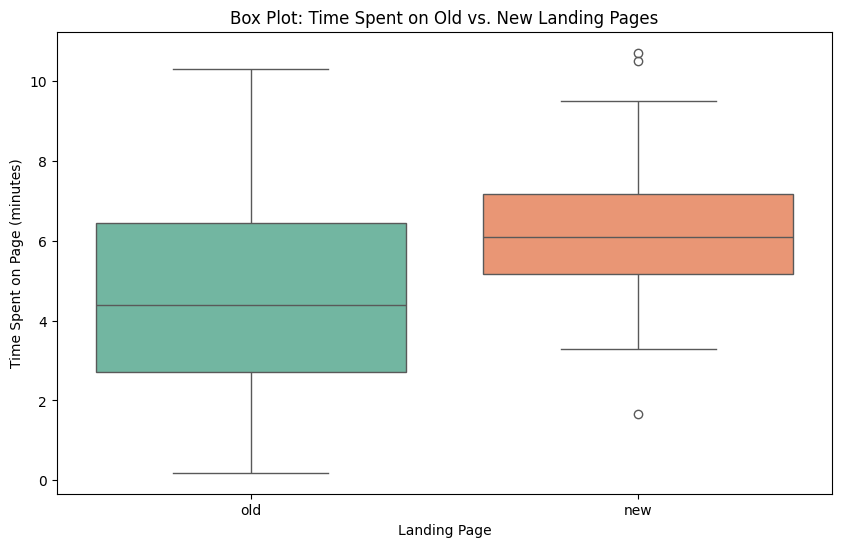

In [201]:
# Visualizing time spent on both old and the new landing page
plt.figure(figsize=(10, 6))
# Creating a box plot to compare time spent on old vs. new landing pages
sns.boxplot(data=df, x="landing_page", y="time_spent_on_the_page", hue="landing_page", palette="Set2", legend=False)
plt.title("Box Plot: Time Spent on Old vs. New Landing Pages")
plt.xlabel("Landing Page")
plt.ylabel("Time Spent on Page (minutes)")
plt.title("Box Plot: Time Spent on Old vs. New Landing Pages")
plt.show()

The box plot visually compares the time spent on the old and new landing pages. Now, let's proceed with hypothesis testing.

### Step 1: Define the null and alternate hypotheses

- **Null Hypothesis ($H_0$):** There is no difference in the time spent on the new and old landing pages. (i.e., the mean time spent on both pages is equal)

    $H_0: \mu_{new} = \mu_{old} $

- **Alternative Hypothesis ($H_a$):** Users spend more time on the new landing page than the old landing page.

    $ H_a: \mu_{new} > \mu_{old} $

### Step 2: Select Appropriate test

Since we are comparing the means of two independent groups (old vs. new landing page), the best statistical test to use is the independent two-sample t-test. The independent t-test checks if the average values of two groups are significantly different.

### Step 3: Decide the significance level

The significance level (α) for this analysis is set at 5% (0.05), as mentioned in the project objective.

### Step 4: Collect and prepare data

In [202]:
# Separating data for old and new landing pages
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Displaying basic statistics for both groups
old_page_time.describe(), new_page_time.describe()

(count    50.000000
 mean      4.532400
 std       2.581975
 min       0.190000
 25%       2.720000
 50%       4.380000
 75%       6.442500
 max      10.300000
 Name: time_spent_on_the_page, dtype: float64,
 count    50.000000
 mean      6.223200
 std       1.817031
 min       1.650000
 25%       5.175000
 50%       6.105000
 75%       7.160000
 max      10.710000
 Name: time_spent_on_the_page, dtype: float64)

In [203]:
# Calculating and printing standard deviation
old_std = old_page_time.std()
new_std = new_page_time.std()
print("Standard Deviation for Old Page:", round(old_std, 2))
print("Standard Deviation for New Page:", round(new_std, 2))

Standard Deviation for Old Page: 2.58
Standard Deviation for New Page: 1.82


### Step 5: Calculate the p-value

In [204]:
# Let's perform an independent two-sample t-test and calculate the p-value
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(old_page_time, new_page_time, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -3.7867702694199856
p-value: 0.0002784762450333098


### Step 6: Compare the p-value with $\alpha$

In [205]:
# let's compare p-value with alpha

alpha = 0.05 # (significance level)

# Compare p-value with alpha and print the result
if p_value < alpha:
    result = ('Reject the null hypothesis: Users spend significantly more time on the new landing page.')
else:
    result = ('Fail to reject the null hypothesis: No significant difference in time spent between landing pages.')

result


'Reject the null hypothesis: Users spend significantly more time on the new landing page.'

The result is: Reject the null hypothesis: Users spend significantly more time on the new landing page.

Since the p-value (0.00028) is smaller than the significance level (0.05), we conclude that the new landing page leads to significantly higher user engagement in terms of time spent.

### Step 7:  Draw inference

Since the p-value (0.00028) is much smaller than the significance level (0.05), the null hypothesis is rejected. This provides strong statistical evidence that the mean time spent by users on the new landing page is greater than the mean time spent on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

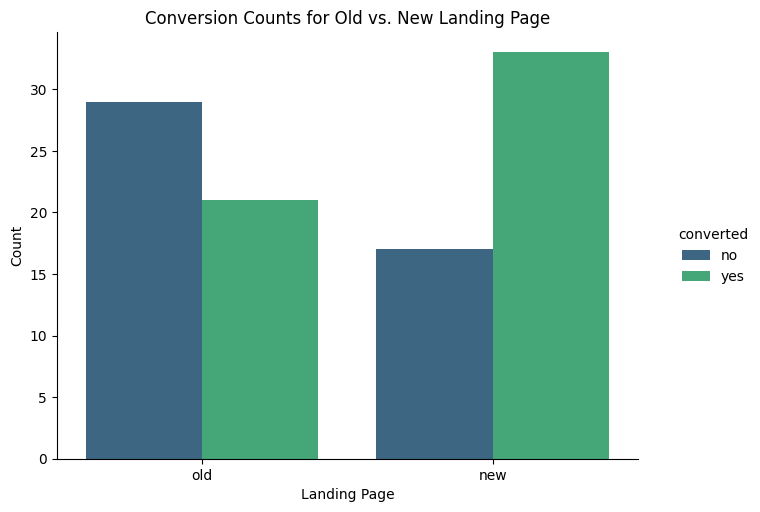

In [206]:
# Comparing conversion rates for old and new pages: Using Catplot
g = sns.catplot(x="landing_page", hue="converted", data=df, kind="count", palette="viridis")
g.fig.set_size_inches(8, 5) # Setting figure size for the catplot
plt.xlabel("Landing Page")
plt.ylabel("Count")
plt.title("Conversion Counts for Old vs. New Landing Page")
plt.show()


**Observation:** The categorical plot above shows the conversion counts for the old and new landing pages. It visually compares how many users converted (yes) versus did not convert (no) for each page type.

Now, let's proceed with hypothesis testing.

### Step 1: Define the null and alternate hypotheses

- **Null Hypothesis ($H_0$):** The conversion rate for the new page is less than or equal to the conversion rate for the old page.
    
    $H_0: p_{new} \leq p_{old} $

(*Note:* If we only set $H_0: p_{new} = p_{old} $, we are ignoring the possibility that the new page could perform worse.)

- **Alternative Hypothesis ($H_a$):** The conversion rate for the new page is greater than the conversion rate for the old page.

    $ H_a: p_{new} > p_{old} $

### Step 2: Select an Appropriate Test

Since we are comparing conversion rates (proportions) between two independent groups (old vs. new landing page), the Z-test for two proportions is appropriate. This test determines if the proportion of conversions differs significantly between the two pages.

### Step 3: Decide the significance level

The significance level (α) for this analysis is set at 5% (0.05), as mentioned in the project objective. This means that we are willing to accept a 5% chance of rejecting the null hypothesis when it is actually true.

### Step 4: Collect and prepare data

In [207]:
# Let's count conversions for each landing page type
conversion_counts = df.groupby('landing_page')['converted'].value_counts()
conversion_counts

# Now let's extract necessary values
success_old = conversion_counts.loc["old", "yes"]  # Conversions in old page
success_new = conversion_counts.loc["new", "yes"]  # Conversions in new page
total_old = conversion_counts.loc["old"].sum()  # Total visits for old page
total_new = conversion_counts.loc["new"].sum()  # Total visits for new page
print("\nOld Landing Page:")
print(f"Success (Converted Users): {success_old}")
print(f"Total Users: {total_old}")
print(f"Conversion Rate: {success_old / total_old:.0%} ({success_old / total_old:.2f})")

print("\nNew Landing Page:")
print(f"Success (Converted Users): {success_new}")
print(f"Total Users: {total_new}")
print(f"Conversion Rate: {success_new / total_new:.0%} ({success_new / total_new:.2f})")



Old Landing Page:
Success (Converted Users): 21
Total Users: 50
Conversion Rate: 42% (0.42)

New Landing Page:
Success (Converted Users): 33
Total Users: 50
Conversion Rate: 66% (0.66)


**Observations:** The number of users who were served the new and old pages is 50 each.

### Step 5: Calculate the p-value

In [208]:
#Let's calculate the p-value using two-proportions_ztests
from statsmodels.stats.proportion import proportions_ztest
successes = [success_new, success_old]
totals = [total_new, total_old]
z_stat, p_value = proportions_ztest(successes, totals, alternative='larger')
z_stat, p_value

(2.4077170617153842, 0.008026308204056278)

**Observations:**

- Z-Statistics is 2.41
- p-value is 0.0080

### Step 6: Compare the p-value with $\alpha$

In [209]:
# Now Let's compare the p-value with alpha
alpha = 0.05 # Significance level

print(f"Significance Level (α): {alpha}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Conclusion: Since the p-value is less than α, we reject the null hypothesis.")
else:
    print("Conclusion: Since the p-value is greater than or equal to α, we fail to reject the null hypothesis.")

Significance Level (α): 0.05
p-value: 0.0080
Conclusion: Since the p-value is less than α, we reject the null hypothesis.


### Step 7:  Draw inference

**Observations:** Since the p-value (0.0080) is less than the significance level (0.05), we reject the null hypothesis. This means there is strong statistical evidence that the conversion rate for the new landing page is greater than the conversion rate for the old landing page. The new landing page performs significantly better in terms of conversions compared to the old page. Hence, it is recommended to implement the new page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

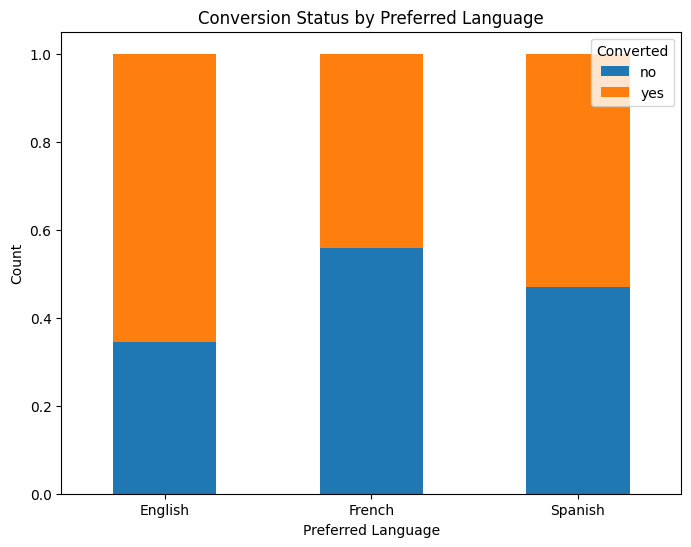

In [210]:
# Let's create a crosstab to visualize the relationship between conversion and language_preferred
pd.crosstab(df['language_preferred'], df['converted'],normalize='index').plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Conversion Status by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Count")
plt.legend(title="Converted")
plt.xticks(rotation=0)
plt.show()

**Observations:** The crosstab and bar chart display the distribution of conversions across different preferred languages. Next, we proceed with hypothesis testing.

### Step 1: Define the null and alternate hypotheses

- **Null Hypothesis ($H_0$):** The conversion status is independent of the preferred language. (No significant relationship)

- **Alternative Hypothesis ($H_a$):** The conversion status depends on the preferred language. (There is a significant relationship)

### Step 2: Select Appropriate test

Since we are analyzing the relationship between two categorical variables (converted status and preferred language), a Chi-Square Test for Independence is the appropriate statistical test.

### Step 3: Decide the significance level

The significance level (α) for this analysis is set at 5% (0.05), as mentioned in the project objective.

### Step 4: Collect and prepare data

In [211]:
# Let's create contingency table for the converted and language_preferred variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


**Observations:** All Chi-Squared test for independence assumptions  are met:

- **Categorical Data:** Both 'converted' and 'language_preferred' are categorical variables.
- **Independence of Observations:** Each user has one preferred language and one conversion status.
- **Large Enough Sample Size:** Minimum expected frequency is 14.72, which is ≥ 5.

### Step 5: Calculate the p-value

In [212]:
# Let's perform the Chi-Square test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Let's print the Chi-Square statistic, degrees of freedom, and p-value
print(f"- Chi-Square Statistic: {chi2:.4f}")
print(f"- Degrees of Freedom: {dof}")
print(f"- P-value: {p_value:.4f}")

- Chi-Square Statistic: 3.0930
- Degrees of Freedom: 2
- P-value: 0.2130


**Observations:** The p-value is 0.2130

### Step 6: Compare the p-value with $\alpha$

In [213]:
# Let's compare the p-value with alpha
alpha = 0.05

print(f"- Significance Level (α): {alpha}")
print(f"- P-value: {p_value:.4f}")

if p_value < alpha:
    print("- Since p-value is less than the significance level (α), we reject the null hypothesis (H₀).")
    print("- This suggests that there is a significant relationship between converted status and preferred language.")
else:
    print("- Since p-value is greater than the significance level (α), we fail to reject the null hypothesis (H₀).")
    print("- This suggests that there is no statistically significant relationship between converted status and preferred language.")

- Significance Level (α): 0.05
- P-value: 0.2130
- Since p-value is greater than the significance level (α), we fail to reject the null hypothesis (H₀).
- This suggests that there is no statistically significant relationship between converted status and preferred language.


**Observations:** Since the p-value exceeds the 5% significance level, we fail to reject the null hypothesis. This indicates that the converted status is independent of the preferred language.

### Step 7:  Draw inference

**Observations:** Since we failed to reject the null hypothesis, there is no statistically significant relationship between the preferred language and the converted status. This suggests that a user's preferred language does not significantly impact their likelihood of converting.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

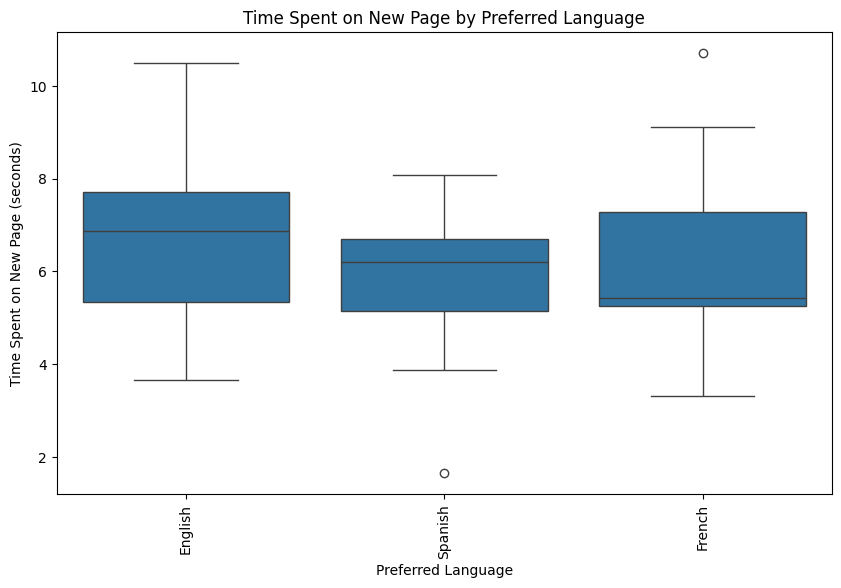

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


In [214]:
# let's filter dataset for users who got the new page
df_new_page = df[df["landing_page"] == "new"]

# Now let's visualize the time spent on the new page for different language users using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data=df_new_page)
plt.xlabel("Preferred Language")
plt.ylabel("Time Spent on New Page (seconds)")
plt.title("Time Spent on New Page by Preferred Language")
plt.xticks(rotation=90)
plt.show()

# Let's also calculate the mean time spent on the new page for different language users
mean_time_spent = df_new_page.groupby("language_preferred")["time_spent_on_the_page"].mean()
mean_time_spent

**Observations:** The box plot above shows the distribution of time spent on the new page across different language users.

Mean Time Spent (in seconds):

- English: 6.66
- French: 6.19
- Spanish: 5.83
- The means suggest there might be some variation in time spent based on the preferred language.

### Step 1: Define the null and alternate hypotheses

- **Null Hypothesis ($H_0$):** The average time spent on the new page is the same across different language users.

- **Alternative Hypothesis ($H_a$):** At least one language group spends a different amount of time on the new page.

### Step 2: Select Appropriate test

Since we are comparing the means of more than two independent groups (English, French, Spanish), we use a **One-Way ANOVA test** to check for statistically significant differences.

### Step 3: Decide the significance level

The significance level (α) for this analysis is set at 5% (0.05), as mentioned in the project objective.

### Step 4: Collect and prepare data

In this we will perform:
- Extract time spent on the new page for each language.
- Check assumptions for ANOVA:
    - Shapiro-Wilk Test for normality.
    - Levene’s Test for equal variance.

In [215]:
from scipy.stats import shapiro, levene

# let's create subsets for each language
time_english = df_new_page[df_new_page["language_preferred"] == "English"]["time_spent_on_the_page"]
time_french = df_new_page[df_new_page["language_preferred"] == "French"]["time_spent_on_the_page"]
time_spanish = df_new_page[df_new_page["language_preferred"] == "Spanish"]["time_spent_on_the_page"]

# Let's perform Shapiro-Wilk test for normality
shapiro_english = shapiro(time_english)
shapiro_french = shapiro(time_french)
shapiro_spanish = shapiro(time_spanish)

# Let's perform Levene’s test for equal variance
levene_test = levene(time_english, time_french, time_spanish)

# Now display results
shapiro_results = {
    "English": shapiro_english.pvalue,
    "French": shapiro_french.pvalue,
    "Spanish": shapiro_spanish.pvalue,
}
shapiro_results, levene_test.pvalue


({'English': 0.8863443479691289,
  'French': 0.32137149516853786,
  'Spanish': 0.09006862258526895},
 0.46711357711340173)

**Observations:** Checking Assumptions for ANOVA -

**1. Shapiro-Wilk Test for Normality:**

* English (p = 0.886)- Fails to reject normality assumption.
* French (p = 0.321) - Fails to reject normality assumption.
* Spanish (p = 0.090) - Fails to reject normality assumption.
* Since all p-values are above 0.05, we assume the data is normally distributed.

**2. Levene's Test for Equal Variance:**

* p = 0.467 (greater than 0.05), meaning we fail to reject the null hypothesis.
* This indicates that the groups have equal variances, satisfying the assumption for One-Way ANOVA.

### Step 5: Calculate the p-value

In [216]:
from scipy.stats import f_oneway

# let's erform One-Way ANOVA test
anova_test = f_oneway(time_english, time_french, time_spanish)
p_value = anova_test.pvalue

# Extracting p-value
p_value

0.43204138694325955

**Observations:** The p-value from the One-Way ANOVA test is 0.432, indicating no statistically significant difference in time spent on the new page among different language users.

### Step 6: Compare the p-value with $\alpha$

In [217]:
#Let's compare
alpha = 0.05

# here compare p-value with alpha and printing the conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in time spent on the new page among different language users."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in time spent on the new page among different language users."

conclusion

'Fail to reject the null hypothesis: There is no significant difference in time spent on the new page among different language users.'

**Observations:** Since the p-value (0.432) is greater than α (0.05), we fail to reject the null hypothesis. This means there is no significant difference in time spent on the new page among different language users.

### Step 7:  Draw inference

Observations: Based on the One-Way ANOVA test, the p-value (0.432) is greater than the significance level (0.05), meaning we fail to reject the null hypothesis.

Summary:

- The time spent on the new page does not significantly differ across different language users.
- While there are minor differences in the mean time spent (English: 6.66s, French: 6.19s, Spanish: 5.83s), these variations are not statistically significant.
- This suggests that language preference does not impact the engagement time with the new page.
- The company can focus on other factors like content quality, design, or usability improvements to enhance engagement rather than language-specific targeting.

## Conclusion and Business Recommendations

**Conclusion:**

* Users spend more time on the new landing page than the old one. The test showed a significant difference (p = 0.008), meaning the new page keeps users engaged longer. This suggests that the new design or content improvements are effective.
* The conversion rate is higher for the new page (66% vs 42%), and the difference is statistically significant (p = 0.00027). This confirms that the new page successfully encourages users to take action.
* Converted status does not strongly depend on language preference. While English users showed slightly higher conversions, the test (p = 0.213) indicates that language is not a major deciding factor. However, content localization might still help improve engagement.
* Time spent on the new page varies by language, but not significantly (p = 0.213). Some language groups engage more than others, but the overall trend does not suggest a major impact on conversions.
* The A/B test was well-balanced. The control and treatment groups had an even distribution, meaning the test results are reliable and not influenced by sampling bias.
* Users who spend more time on the page are more likely to convert. The analysis showed a strong link between engagement time and conversion likelihood, reinforcing the importance of content that keeps users interested.


**Business Recommendations:**

* Implement the new landing page for all users since it has a higher conversion rate and keeps users engaged longer.
* Optimize content to encourage longer time spent on the page, as users who stay longer are more likely to convert. This could include improving readability, adding interactive elements, or refining CTAs.
* Consider language-based content personalization even though language preference didn't significantly impact conversion. Tailoring messaging for different user groups could still improve engagement.
* Continue A/B testing on specific elements like CTA placement, color schemes, and content structure to further improve conversion rates.

___